<a href="https://colab.research.google.com/github/Inyrkz/IoT-Intrusion-Detection/blob/main/IoT_ML_with_Hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering
This project will make use of the ToN-IoT dataset. The code below will download the dataset.

In [ ]:
# Download Dataset
import requests

def download_dataset(url, file_name):
  '''function to download dataset from url
  args
  url: str, download link
  file_name: str, name of the file
  '''
  r = requests.get(url, allow_redirects=True)
  open(file_name, 'wb').write(r.content)

    
download_dataset('https://cloudstor.aarnet.edu.au/plus/s/ds5zW91vdgjEj9i/download?path=%2FTrain_Test_datasets%2FTrain_Test_Network_dataset&files=Train_Test_Network.csv&downloadStartSecret=ohroysxk3vq',
                 'Train_Test_Network.csv')

### Load Datasets

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# view all columns and 200 rows
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 200)

# load the dataset
dataset = pd.read_csv("/content/Train_Test_Network.csv")
dataset

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,S0,0,1,60,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,OTH,0,0,0,1,103,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,0,108,108064,31,3832,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,SF,0,8,411,7,395,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm


In [ ]:
# list all dataset columns
print("Full Dataset Columns", dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column", 
      dataset['type'].unique(), sep='\n')

Full Dataset Columns
Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

Unique values in the 'category' column
['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [ ]:
# Check the number of duplicate records
dataset.duplicated().sum()

11071

## Unique Values of some Variables

In [ ]:
# check the unique values in the service column
dataset.service.value_counts()

-             280216
dns           116480
http           60720
ssl             2070
ftp             1065
gssapi           184
dce_rpc          136
smb              108
dhcp              46
smb;gssapi        18
Name: service, dtype: int64

In [ ]:
# check the unique values in the proto column
dataset.proto.value_counts()

tcp     282076
udp     173087
icmp      5880
Name: proto, dtype: int64

In [ ]:
# check the unique values in the conn_state column
dataset.conn_state.value_counts()

SF        123512
S0        113495
OTH       111842
REJ        45036
SHR        22053
SH         18138
S1         13843
S3          6642
RSTR        2360
RSTRH       1724
RSTO        1518
S2           708
RSTOS0       172
Name: conn_state, dtype: int64

In [ ]:
# check the unique values in the dns_query column
dataset.dns_query.value_counts()

-                                                  366019
a2z3kk2ebqzso7.iot.ap-southeast-2.amazonaws.com     13700
arpa.whois-servers.net                               2198
_sleep-proxy._udp.local                              2187
testphp.vulnweb.com                                  1848
                                                    ...  
94.157.81.140.in-addr.arpa                              1
125.48.34.73.in-addr.arpa                               1
101.192.178.247.in-addr.arpa                            1
254.68.212.in-addr.arpa                                 1
loadm.exelator.com                                      1
Name: dns_query, Length: 14149, dtype: int64

In [ ]:
# check the unique values in the dns_qclass column
dataset.dns_qclass.value_counts()

0        366377
1         92700
32769      1966
Name: dns_qclass, dtype: int64

In [ ]:
# check the unique values in the dns_qtype column
dataset.dns_qtype.value_counts()

0      366377
1       36080
12      21932
28      20282
43       9061
255      5082
2        1284
48        667
32        210
33         59
6           6
16          3
Name: dns_qtype, dtype: int64

In [ ]:
# check the unique values in the dns_rcode column
dataset.dns_rcode.value_counts()

0    448777
3     10510
5      1187
2       565
1         4
Name: dns_rcode, dtype: int64

In [ ]:
# check the unique values in the http_resp_mime_types column
dataset.http_resp_mime_types.value_counts()

-                                    460883
application/xml                          63
text/html                                41
image/png                                15
application/vnd.ms-cab-compressed        13
text/plain                               11
application/ocsp-response                 8
text/json                                 4
image/jpeg                                4
application/x-debian-package              1
Name: http_resp_mime_types, dtype: int64

In [ ]:
# check the unique values in the http_orig_mime_types column
dataset.http_orig_mime_types.value_counts()

-                       461029
application/xml              8
application/soap+xml         6
Name: http_orig_mime_types, dtype: int64

In [ ]:
# check the unique values in the http_user_agent column
dataset.http_user_agent.value_counts()

-                                                                                                                                    460809
Microsoft-Delivery-Optimization/10.0                                                                                                     57
Microsoft-Windows/10.0 UPnP/1.0                                                                                                          32
Ruby                                                                                                                                     31
DAFUPnP                                                                                                                                  19
User-Agent: Microsoft-DLNA DLNADOC/1.50                                                                                                  19
Windows-Update-Agent/10.0.10011.16384 Client-Protocol/1.91                                                                               11
MICROSOFT_DEVICE_MET

In [ ]:
# check the unique values in the weird_name column
dataset.weird_name.value_counts()

-                                   459749
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [ ]:
# check the unique values in the weird_addl column
dataset.weird_addl.value_counts()

-     460290
46       707
48        38
43         8
Name: weird_addl, dtype: int64

In [ ]:
# check the unique values in the weird_notice column
dataset.weird_notice.value_counts()

-    459749
F      1294
Name: weird_notice, dtype: int64

# Observation
1. Missing values in the dataset are represented with `-`.
2. The dataset consist of `461043` entries and `45` columns. 

# Assessment
**Quality Issue**
1. There are `11071` duplicate records in the dataset
2. The following columns have a lot of `-` values: `dns_query`, `dns_AA`,	`dns_RD`,	`dns_RA`,	`dns_rejected`, `service`,	`ssl_version`,	`ssl_cipher`,	`ssl_resumed`,	`ssl_established`,	`ssl_subject`,	`ssl_issuer`,	`http_trans_depth`,	`http_method`,	`http_uri`,	`http_version`, `http_user_agent`,	`http_orig_mime_types`,	`http_resp_mime_types`.


# Data Cleaning
1. Remove duplicate values.
2. Remove unnecessary columns.
    - The `ts` variable has high cardinality. It won't be useful.
    - The `src_ip`,	`src_port`, `dst_ip`, and	`dst_port` are addresses. Devices have unique ip addresses. These columns won't help us detect attacks.
    - The `service` variable has a lot of `-` values. These are missing values.
    - The `dns_query` variable has a lot of `-` values. The other values won't be helpful to our ML model.
    - `dns_query`, `dns_AA`,	`dns_RD`,	`dns_RA`,	`dns_rejected`,	`ssl_version`,	`ssl_cipher`,	`ssl_resumed`,	`ssl_established`,	`ssl_subject`,	`ssl_issuer`,	`http_trans_depth`,	`http_method`,	`http_uri`,	`http_version`, `http_user_agent`,	`http_orig_mime_types`,	`http_resp_mime_types`, `weird_name`,	`weird_addl`,	`weird_notice`.
3. One-Hot encode the `proto` variable. It has 3 unique values: `tcp`, `udp`, and `icmp`.
4. One-Hot encode the `conn_state` variable. It has 13 unique values.
5. Remove the `type` variable. The `label` variable will be used as target instead.

### Feature Extraction

In [ ]:
# create a copy of the original dataset
df = dataset.copy()

# the variables to drop
drop_features = ['ts', 'src_ip',	'src_port', 'dst_ip',	'dst_port', 'service',
                 'dns_query', 'dns_AA',	'dns_RD',	'dns_RA',	'dns_rejected',	
                 'ssl_version',	'ssl_cipher',	'ssl_resumed',	'ssl_established',
                 'ssl_subject',	'ssl_issuer',	'http_trans_depth', 'http_method',
                 'http_uri',	'http_version', 'http_user_agent',	
                 'http_orig_mime_types',	'http_resp_mime_types', 'weird_name',
                 'weird_addl',	'weird_notice']

# Remove the variables
df.drop(drop_features, axis=1, inplace=True)
df.head()

,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label,type
0,tcp,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,0,0,0,0,0,0,0,normal
1,udp,0.000000,0,0,S0,0,1,63,0,0,0,0,0,0,0,0,0,normal
2,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,0,0,0,0,normal
3,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,0,0,0,0,normal
4,udp,0.000549,0,298,SHR,0,0,0,2,354,0,0,0,0,0,0,0,normal


In [ ]:
df.shape

(461043, 18)

After removing the unncessary columns, there are now 461043 records and 18 columns in the dataset.

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(186834, 18)

After removing the unncessary columns, there are now 186834 records and 18 columns in the dataset.

## Visualize the target variable

normal        116837
injection      19849
password       15248
ddos           11962
xss             8740
dos             6448
scanning        4493
backdoor        1966
mitm            1031
ransomware       260
Name: type, dtype: int64


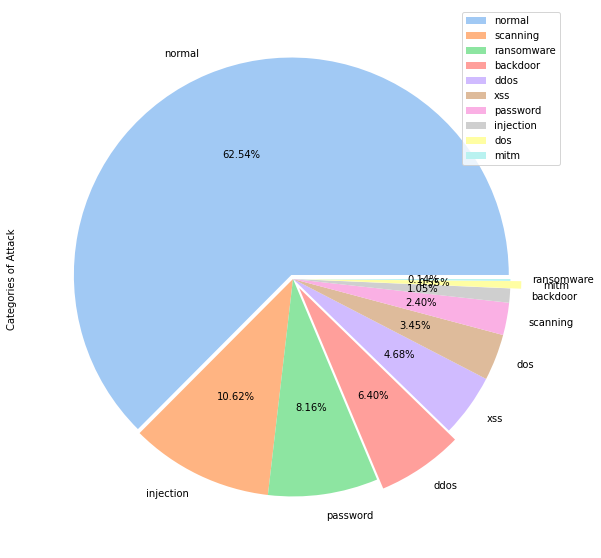

In [ ]:
# check the number of unique values in the target variable

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

print(df['type'].value_counts())
df['type'].value_counts().plot(kind='pie',
                               explode=[0.02, 0, 0, 0.05, 0, 0, 0, 0, 0.05, 0],
                               figsize=(10, 10),
                               colors=palette_color,
                               autopct = '%1.2f%%',
                               shadow = False)

plt.ylabel("Categories of Attack")
plt.legend(['normal', 'scanning', 'ransomware', 'backdoor', 'ddos', 'xss',
            'password', 'injection', 'dos', 'mitm'])
plt.show()

There are more records of `normal` connection in the dataset.
* normal        `116837`
* injection      `19849`
* password       `15248`
* ddos           `11962`
* xss             `8740`
* dos             `6448`
* scanning        `4493`
* backdoor        `1966`
* mitm            `1031`
* ransomware       `260`

The dataset is imbalanced

0    116837
1     69997
Name: label, dtype: int64


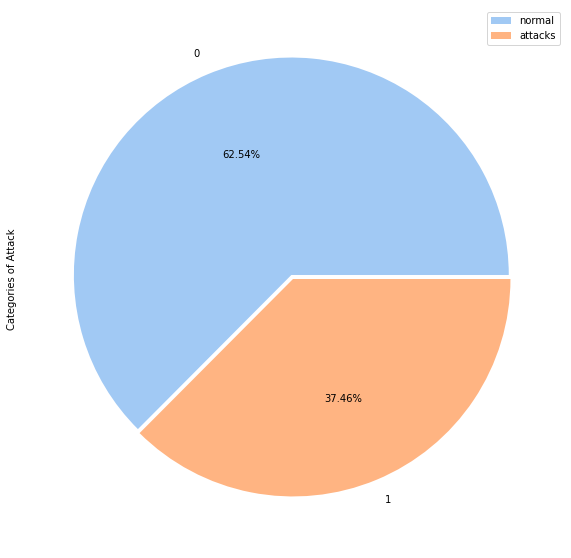

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

print(df['label'].value_counts())
df['label'].value_counts().plot(kind='pie',
                               explode=[0.02, 0],
                               figsize=(10, 10),
                               colors=palette_color,
                               autopct = '%1.2f%%',
                               shadow = False)

plt.ylabel("Categories of Attack")
plt.legend(['normal', 'attacks'])
plt.show()

`62.5%` of the data is on `Normal` connection to IoT devices. But `37.5%` of the data is on `Attacks` on IoT devices. The dataset is imbalanced.

In [ ]:
df.head()

,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label,type
0,tcp,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,0,0,0,0,0,0,0,normal
1,udp,0.000000,0,0,S0,0,1,63,0,0,0,0,0,0,0,0,0,normal
2,tcp,0.000000,0,0,OTH,0,0,0,0,0,0,0,0,0,0,0,0,normal
4,udp,0.000549,0,298,SHR,0,0,0,2,354,0,0,0,0,0,0,0,normal
14,udp,0.000499,0,298,SHR,0,0,0,2,354,0,0,0,0,0,0,0,normal


In [ ]:
# one-hot encode the proto variable and reset index
proto_col = pd.get_dummies(df.proto)
proto_col.reset_index(inplace=True, drop=True)
display(proto_col.head())

# one-hot encode the conn_state variable and reset index
conn_state_col = pd.get_dummies(df.conn_state)
conn_state_col.reset_index(inplace=True, drop=True)
display(conn_state_col.head())

# reset index of df DataFrame
df.reset_index(inplace=True, drop=True)

# merge these one-hot encoded columns with the df DataFrame
df = pd.concat([proto_col, conn_state_col, df], axis=1)

# drop the original columns
df.drop(['proto', 'conn_state', 'type'], axis=1, inplace=True)
df.head()

,icmp,tcp,udp
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1


,icmp,tcp,udp,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80549.530260,1762852,41933215,0,252181,14911156,2,236,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,0,0,0,1,63,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000549,0,298,0,0,0,2,354,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000499,0,298,0,0,0,2,354,0,0,0,0,0,0,0


In [ ]:
print(df.shape)

(186834, 31)


After one-hot encoding, there are 31 variables

### Check for Correlation between the features

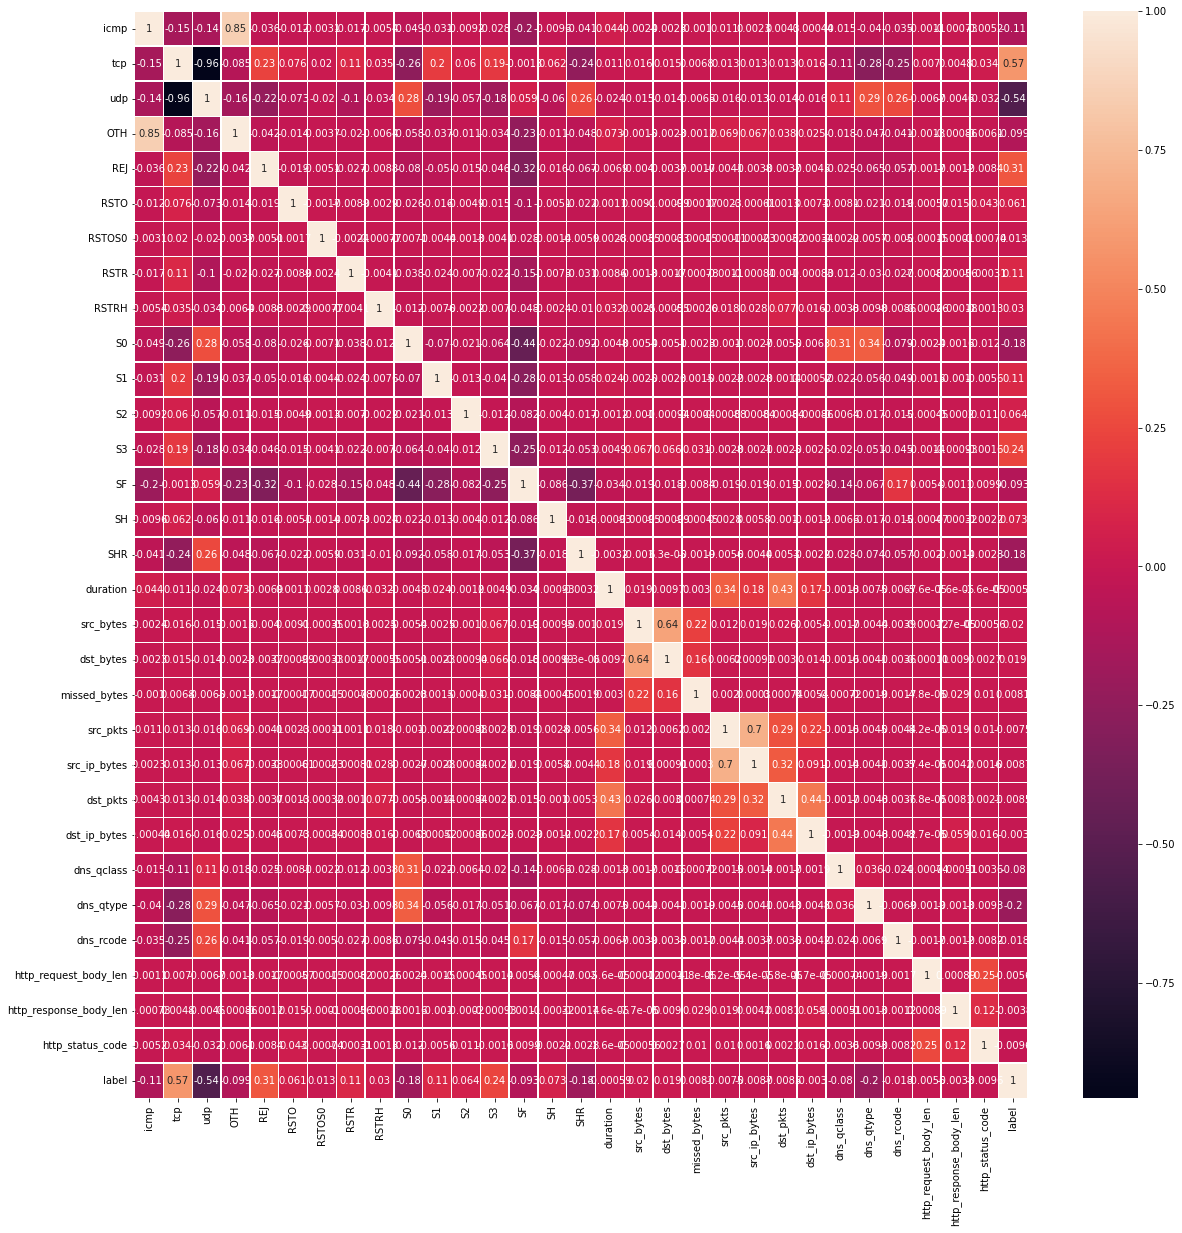

In [ ]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

* There is a correlation of `0.85` between the `icmp` and `OTH`.
* There is a high negative correlation of `-0.96` between the `udp` and `tcp`.
* There is a correlation of `0.7` between the `src_ip_bytes` and `src_pkts`.
* There is a correlation of `0.6` between the `src_bytes` and `dst_bytes`.

In [ ]:
# remove the udp column because of high correlation with the tcp column
df.drop(['udp'], axis=1, inplace=True)
df.head(1)

,icmp,tcp,OTH,REJ,RSTO,RSTOS0,RSTR,RSTRH,S0,S1,S2,S3,SF,SH,SHR,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,80549.53026,1762852,41933215,0,252181,14911156,2,236,0,0,0,0,0,0,0


In [ ]:
# Split Data into Features and Target variables
X = df.iloc[:, :-1].values
y = df.label

print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
--------------------------------------------------
Target Variable
0         0
1         0
2         0
3         0
4         0
         ..
186829    1
186830    1
186831    1
186832    1
186833    1
Name: label, Length: 186834, dtype: int64


# Split Data into Training Set and Test Set

The dataset will be splitted into the training set and the test set. The model will be trained on the training set. After training, the model will be evaluated using the test set. The split ratio is 75:25.

In [ ]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.25,
                                                  random_state=0, 
                                                  stratify=y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_train, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X Validation set
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y Training set
129973    1
105201    0
179545    0
105624    0
179751    0
         ..
178649    0
61425     1
103254    0
31960     1
111361    0
Name: label, Length: 140125, dtype: int64
y Validation set
151735    0
133658    0
130267    1
63330     1
161608    1
         ..
42448     1
111260    0
140778    0
28706     1
116953    0
Name: label, Length: 46709, dtype: int64


### Train Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  f1 = f1_score(y_val, y_pred)
  
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['normal', 'attack']

### Random Forest Classifier For Feature Selection
I'll train a random forest classifier on the model. Evaluate it. The main goal is to use it for feature selection. Let's see the important features.

{'accuracy_score': 0.9922927059025027, 'precision_score': 0.9892663431344562, 'recall_score': 0.9901708669066804, 'f1_score': 0.9897183983549438}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29210
           1       0.99      0.99      0.99     17499

    accuracy                           0.99     46709
   macro avg       0.99      0.99      0.99     46709
weighted avg       0.99      0.99      0.99     46709



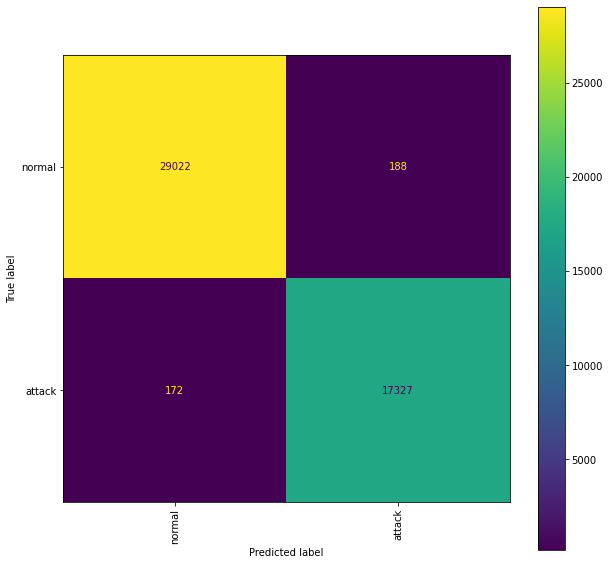

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_val)

print(evaluate_model(y_val, rf_y_pred))
print(classification_report(y_val, rf_y_pred))
plot_confusion_matrix(y_val, rf_y_pred, label)

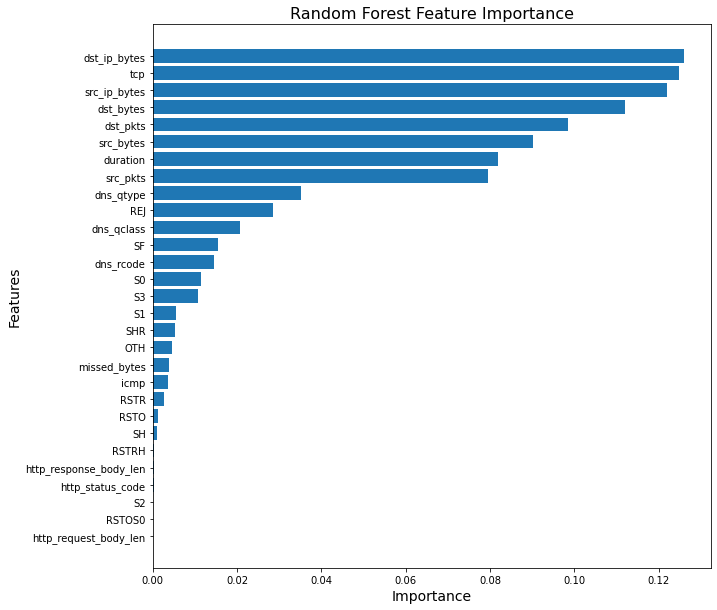

In [ ]:
feature_names = np.array(['icmp', 'tcp', 'OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0',
                 'S1', 'S2', 'S3', 'SF', 'SH', 'SHR', 'duration', 'src_bytes',
                 'dst_bytes', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts',
                 'dst_ip_bytes', 'dns_qclass', 'dns_qtype', 'dns_rcode',
                 'http_request_body_len', 'http_response_body_len', 'http_status_code'])

# sort the most important feature based on index
sorted_idx = rf_model.feature_importances_.argsort()
fig = plt.figure(figsize=(10, 10))
plt.barh(feature_names[sorted_idx], rf_model.feature_importances_[sorted_idx]);
plt.title("Random Forest Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=14)
plt.xlabel('Importance', fontsize=14);

In [ ]:
# the last part is to sort in reverse
best_features = feature_names[sorted_idx][len(feature_names)-11:][::-1]
best_features

array(['dst_ip_bytes', 'tcp', 'src_ip_bytes', 'dst_bytes', 'dst_pkts',
       'src_bytes', 'duration', 'src_pkts', 'dns_qtype', 'REJ',
       'dns_qclass'], dtype='<U22')

Using the Random Forest Classifier, the top 11 features are:
* `tcp`,
* `src_ip_bytes`,
* `dst_bytes`,
* `dst_ip_bytes`,
* `src_bytes`,
* `src_pkts`,
* `dst_pkts`, 
* `duration`,
* `dns_qtype`,
* `REJ`,
* `dns_qclass`

The Hybrid Model consisting of Random Forest and LightGBM will be trained using the top features.

## Hybrid Model

In [ ]:
# Split Data into Features and Target variables
X = df[best_features].values
y = df.label.values

print("Shape of X", X.shape)
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.25,
                                                  random_state=0, 
                                                  stratify=y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_val, sep='\n')
print('y Validation set', y_val, sep='\n')

Shape of X (186834, 11)
Matrix of features
[[2.3600000e+02 1.0000000e+00 1.4911156e+07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 6.3000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.8320000e+03 1.0000000e+00 1.0806400e+05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.9500000e+02 1.0000000e+00 4.1100000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.4300000e+02 1.0000000e+00 4.1100000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
--------------------------------------------------
Target Variable
[0 0 0 ... 1 1 1]
X Training set
[[3.31e+03 1.00e+00 4.90e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.60e+02 0.00e+00 8.30e+01 ... 1.20e+01 0.00e+00 1.00e+00]
 [3.77e+03 1.00e+00 4.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [3.89e+02 0.00e+00 8.30e+01 ... 1.20e+01 0.00e+00 1.00e+00]
 [3.60e+02 1.00e+00 3.60e+02 ... 0.00e+00 1.

{'accuracy_score': 0.9918431137468154, 'precision_score': 0.9889739488117002, 'recall_score': 0.9892565289445111, 'f1_score': 0.9891152186955404}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29210
           1       0.99      0.99      0.99     17499

    accuracy                           0.99     46709
   macro avg       0.99      0.99      0.99     46709
weighted avg       0.99      0.99      0.99     46709



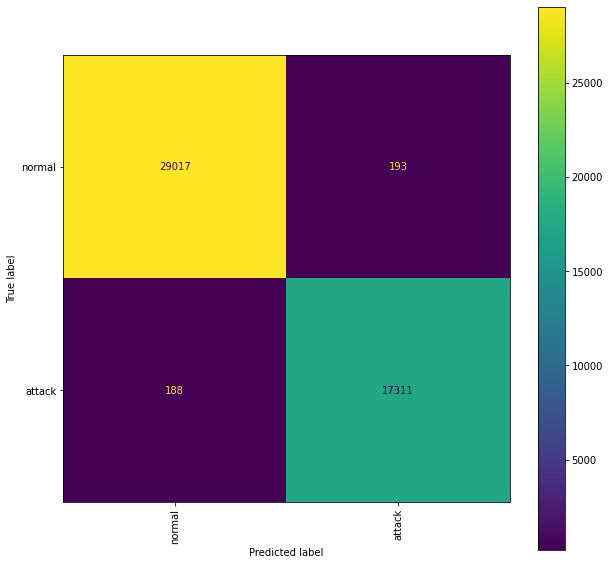

In [ ]:
# Defining Hybrid Ensemble Learning Model
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb

estimators = []

# Defining LGBM Classifiers
model1 = lgb.LGBMClassifier()
estimators.append(('lgbm', model1))

model2 = RandomForestClassifier(n_estimators=200,
                                criterion="entropy",
                                min_samples_split=40,
                                random_state=0)
estimators.append(('rf1', model2))

# Defining the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='hard',
                            weights=[1, 1])

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_val)

result = evaluate_model(y_val, y_pred)
print(result)
print(classification_report(y_val, y_pred))
plot_confusion_matrix(y_val, y_pred, label)

# Visualize the Results

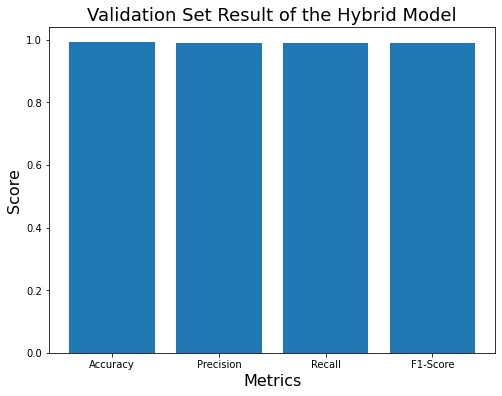

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.bar(result.keys(), result.values());
plt.xticks(np.arange(4), ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.xlabel('Metrics', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title("Validation Set Result of the Hybrid Model", fontsize=18);